<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


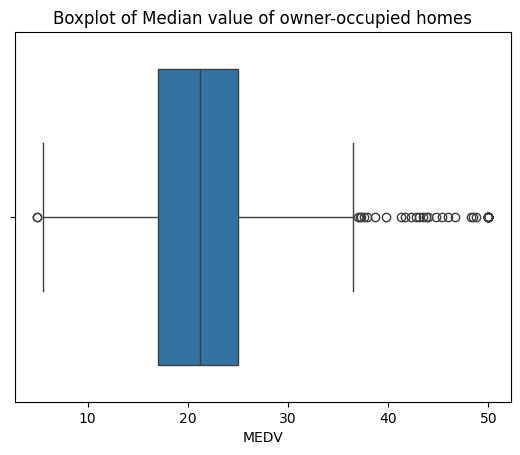

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data = boston_df

# Assuming 'data' is your dataset
sns.boxplot(x='MEDV', data=data)
plt.title('Boxplot of Median value of owner-occupied homes')
plt.show()

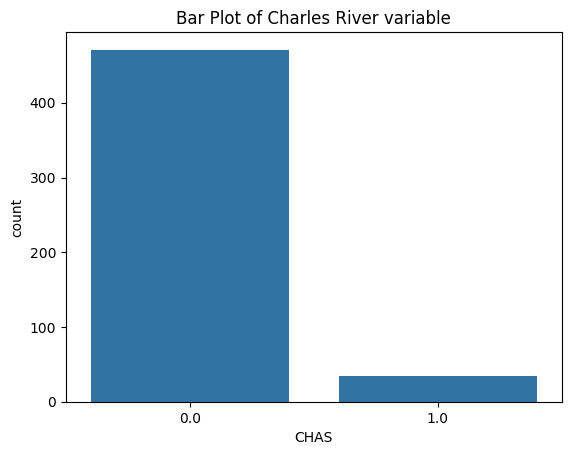

In [7]:
sns.countplot(x='CHAS', data=data)
plt.title('Bar Plot of Charles River variable')
plt.show()


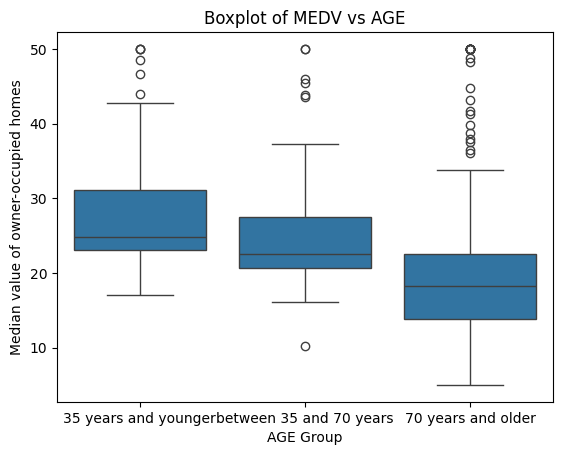

In [8]:
# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
data['AGE_Group'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Boxplot
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('AGE Group')
plt.ylabel('Median value of owner-occupied homes')
plt.show()


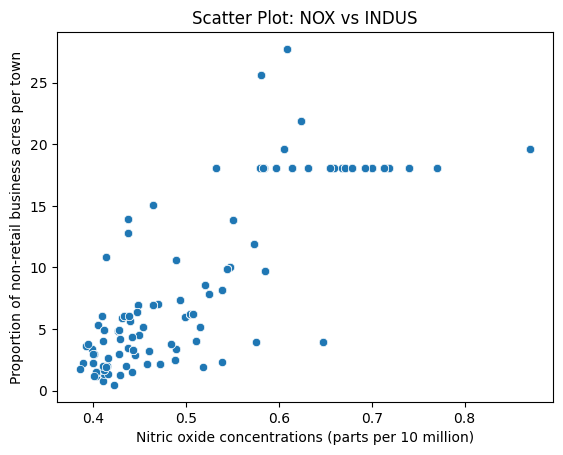

In [9]:
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()


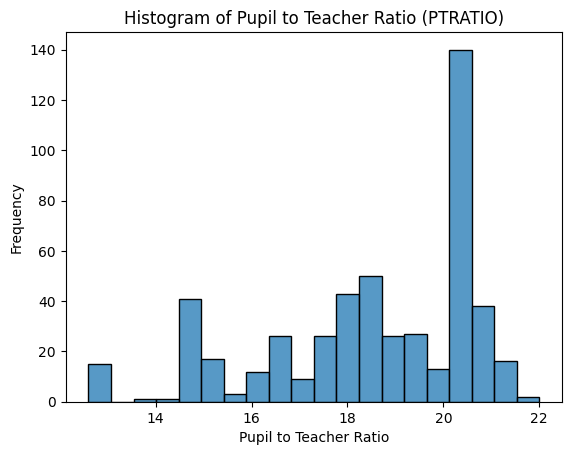

In [10]:
sns.histplot(data['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [25]:

# 1. T-test for independent samples

# Hypotheses
# H0: No significant difference in median values
# H1: Significant difference in median values

# T-test
charles_bounded = df[df['CHAS'] == 1]['MEDV']
not_charles_bounded = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(charles_bounded, not_charles_bounded)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference in median values.")
else:
    print("Fail to reject H0: No significant difference in median values.")


Reject H0: There is a significant difference in median values.


2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)




In [24]:

# Hypotheses
# H0: No difference in median values for each group
# H1: Significant difference in median values for at least one group

# ANOVA
f_stat, p_value = f_oneway(df[df['AGE_Group'] == '35 years and younger']['MEDV'],
                             df[df['AGE_Group'] == 'between 35 and 70 years']['MEDV'],
                             df[df['AGE_Group'] == '70 years and older']['MEDV'])

# Conclusion
if p_value < alpha:
    print("Reject H0: There is a significant difference in median values.")
else:
    print("Fail to reject H0: No significant difference in median values.")



Reject H0: There is a significant difference in median values.


3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [20]:
# Hypotheses
# H0: No relationship between Nitric oxide and non-retail business acres
# H1: There is a relationship

# Pearson Correlation
corr_coeff, p_value = pearsonr(df['NOX'], df['INDUS'])

# Conclusion
if p_value < alpha:
    print("Reject H0: There is a significant relationship.")
else:
    print("Fail to reject H0: No significant relationship.")


Reject H0: There is a significant relationship.


4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



In [21]:

# Assuming df is your DataFrame
X = df['DIS']  # Additional weighted distance
y = df['MEDV']  # Median value of owner-occupied homes

# Hypotheses
# H0: Additional distance has no impact
# H1: Additional distance has an impact

# Add a constant term for intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Conclusion
if model.pvalues['DIS'] < alpha:
    print("Reject H0: There is a significant impact.")
else:
    print("Fail to reject H0: No significant impact.")


Reject H0: There is a significant impact.
